## Notebook Purpose
Join the media csv file generated within with the predictions file to capture data about the predictions

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Read in data
preds_df = pd.read_csv('2025-06-28_predictions_with_url.csv')
media_df = pd.read_csv('../../output/media.csv')


In [4]:
# Take a look at data
print("------------------------- Preds: -------------------------")
display(preds_df.head(1))
print("------------------------- Media: -------------------------")
display(media_df.head(1))


------------------------- Preds: -------------------------


,mediaID,predicted_class,common_name,probability,top3,publicURL
0,002fe9a5dc3a1bf6b14298838bae6982,Branta_canadensis,Canada Goose,0.9101,"Canada Goose: 0.9101, Mallard: 0.0161, Beaver:...",https://urbanriverrangers.s3.amazonaws.com/ima...


------------------------- Media: -------------------------


,mediaID,deploymentID,captureMethod,timestamp,filePath,filePublic,fileName,fileMediatype,exifData,favorite,mediaComments
0,c112813a5f3b9cec26f95fad982b8d09,66e5dee8f8e217337ca907a5,NaN,2024-01-24T18:56:50Z,https://urbanriverrangers.s3.amazonaws.com/ima...,True,SYFW0001.JPG,image/jpeg,"{""Make"": ""TC"", ""Model"": ""XG2"", ""Software"": ""R2...",False,NaN


In [5]:
merged_df = pd.merge(preds_df, media_df, how='left', on='mediaID')
print(merged_df.columns)

Index(['mediaID', 'predicted_class', 'common_name', 'probability', 'top3',
       'publicURL', 'deploymentID', 'captureMethod', 'timestamp', 'filePath',
       'filePublic', 'fileName', 'fileMediatype', 'exifData', 'favorite',
       'mediaComments'],
      dtype='object')


In [6]:
selected_cols = [
    'mediaID', 'predicted_class', 'common_name', 'probability', 'publicURL', 'deploymentID', 'timestamp'
]

media_preds = merged_df[selected_cols]
media_preds.head()

,mediaID,predicted_class,common_name,probability,publicURL,deploymentID,timestamp
0,002fe9a5dc3a1bf6b14298838bae6982,Branta_canadensis,Canada Goose,0.9101,https://urbanriverrangers.s3.amazonaws.com/ima...,66e5dee8f8e217337ca907a5,2024-04-26T22:14:54Z
1,005c423247c6a4cd127cdabf8df3458c,Branta_canadensis,Canada Goose,0.9990,https://urbanriverrangers.s3.amazonaws.com/ima...,66e5dee8f8e217337ca907a5,2024-04-25T19:53:30Z
2,006d951cf93f27e70b3c5aa2190b1135,Branta_canadensis,Canada Goose,0.9916,https://urbanriverrangers.s3.amazonaws.com/ima...,66e5dee8f8e217337ca907a5,2024-04-22T05:46:48Z
3,00716c8d2c5bd8b735bfdb4cb9099519,Castor_canadensis,Beaver,0.3964,https://urbanriverrangers.s3.amazonaws.com/ima...,66e5dee8f8e217337ca907a5,2024-04-20T22:10:49Z
4,00bb8837f97b2266fcf1a6cebc90db40,Branta_canadensis,Canada Goose,0.8593,https://urbanriverrangers.s3.amazonaws.com/ima...,66e5dee8f8e217337ca907a5,2024-05-05T21:46:50Z


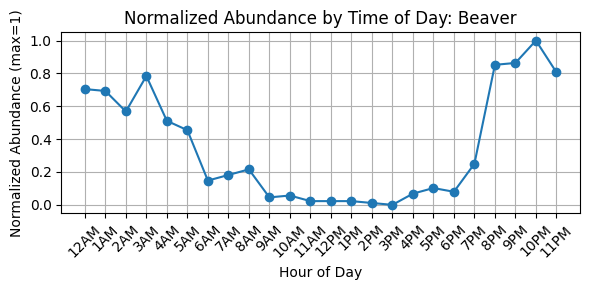

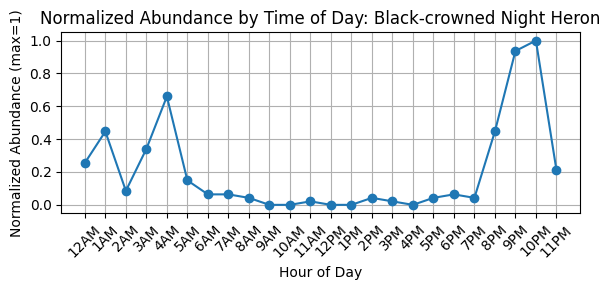

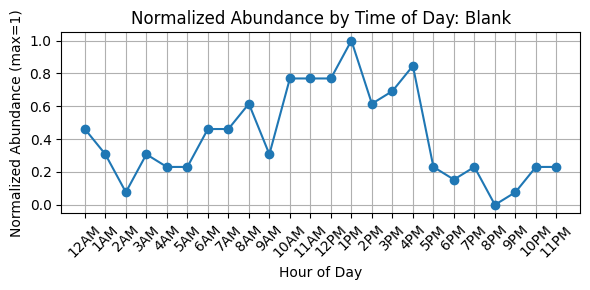

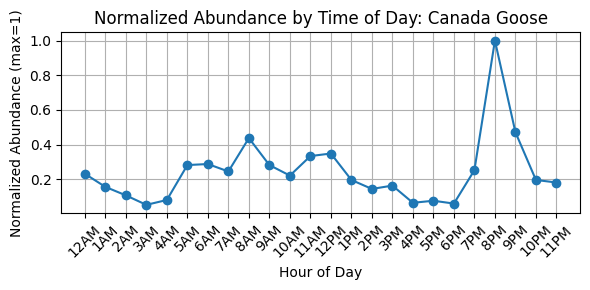

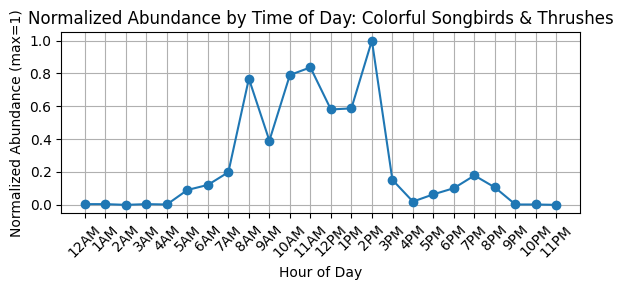

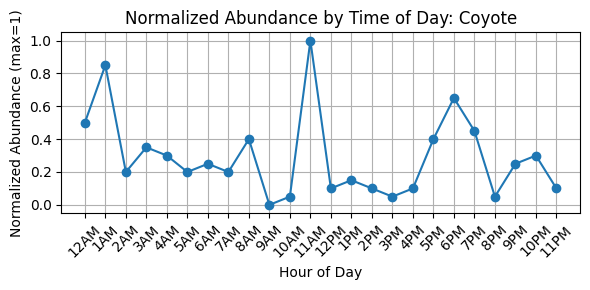

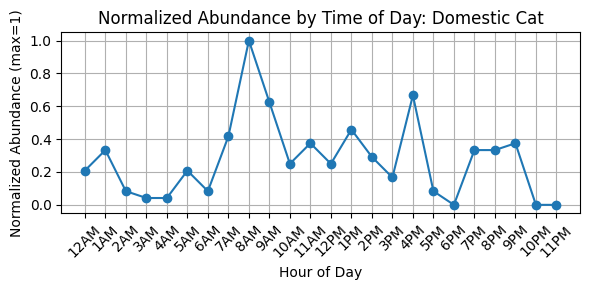

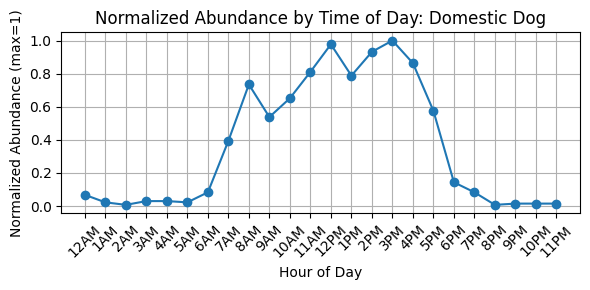

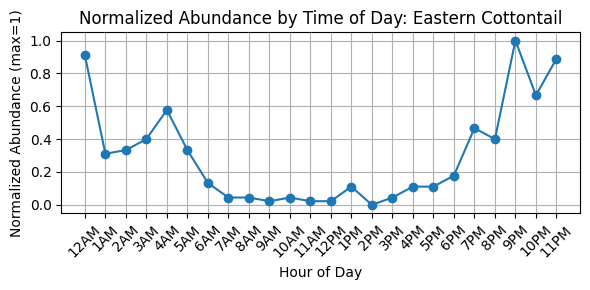

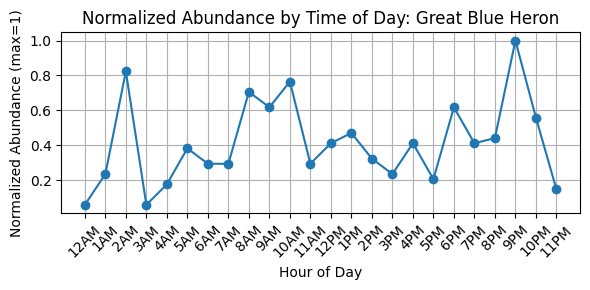

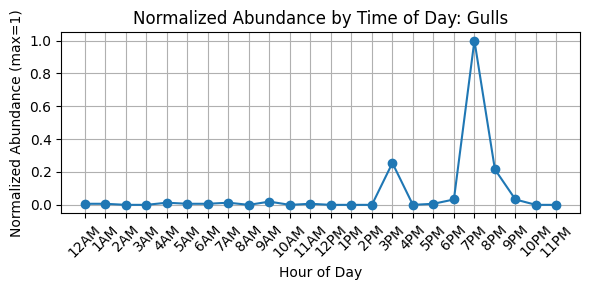

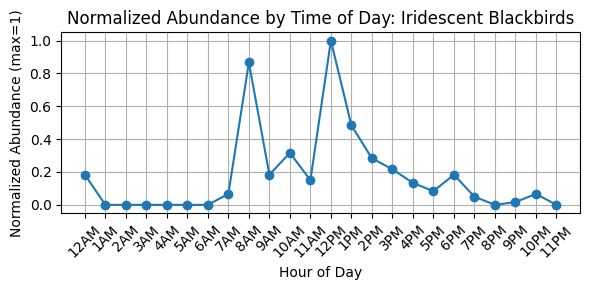

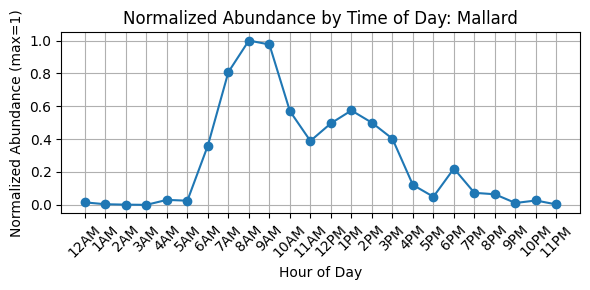

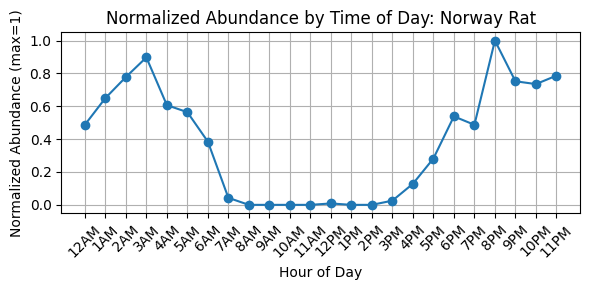

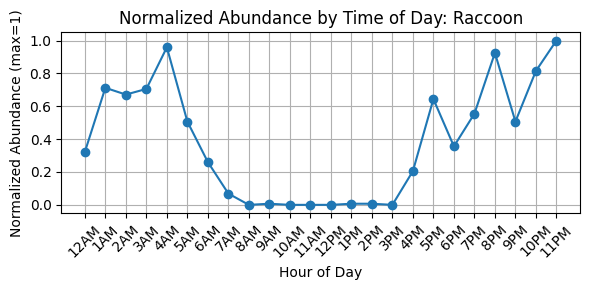

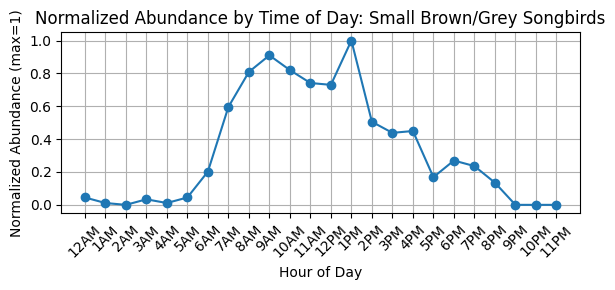

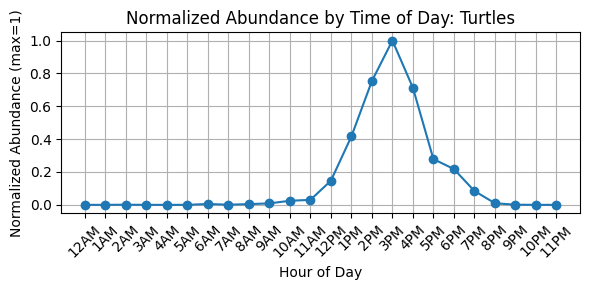

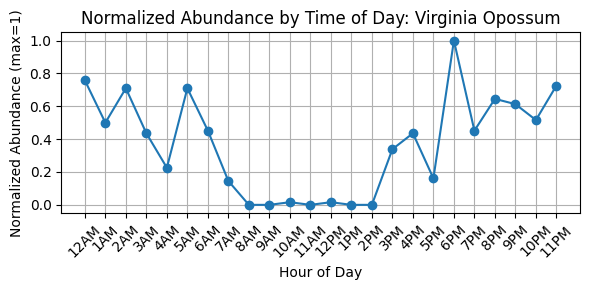

In [10]:
# Ensure timestamp is datetime
media_preds.loc[:, 'timestamp'] = pd.to_datetime(media_preds['timestamp'])

# Extract hour from timestamp
media_preds.loc[:, 'hour'] = media_preds['timestamp'].dt.hour

# Group by species and hour, count occurrences
species_hour_counts = media_preds.groupby(['common_name', 'hour']).size().reset_index(name='count')

# Normalize counts for each species
species_hour_counts['norm_count'] = species_hour_counts.groupby('common_name')['count'].transform(lambda x: x / x.max())

# Plot for each species
species_list = species_hour_counts['common_name'].unique()

hours = range(24)
hour_labels = [f"{h%12 if h%12 else 12}{'AM' if h < 12 else 'PM'}" for h in hours]

for species in species_list:
    data = species_hour_counts[species_hour_counts['common_name'] == species]
    # add 0s for missing data
    data = data.set_index('hour').reindex(hours, fill_value=0).reset_index()

    plt.figure(figsize=(6, 3))
    plt.plot(
        data['hour'],
        data['norm_count'],
        marker='o',
        color='tab:blue'
    )
    plt.xticks(hours, hour_labels, rotation=45)
    plt.xlabel('Hour of Day')
    plt.ylabel('Normalized Abundance (max=1)')
    plt.title(f'Normalized Abundance by Time of Day: {species}')
    plt.grid(True)
    plt.tight_layout()
    

